# Name:- Amany Azzam

# ID:- [20399133] 

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, datasets
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
# read data
covid=pd.read_csv("/content/data.csv", index_col=0)

In [ ]:
# show 5 rows from data
covid.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
print("Size/Shape of the dataset: ",covid.shape)               # print the shape of data
print("Checking for null values:\n",covid.isnull().sum())      #check for nulll values
print("Checking Data-type of each column:\n",covid.dtypes)     # show data type for each column

Size/Shape of the dataset:  (863, 14)
Checking for null values:
 location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64
Checking Data-type of each column:
 location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan        int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
diff_sym_hos      int64
result            int64
dtype: object


In [ ]:
# split data X for features and y for target
X = covid.drop(columns = ['result']).copy()  
y = covid['result']

In [ ]:
#count number of 1's and 0's in the target column
counter = Counter(y)
print(counter)

Counter({0: 755, 1: 108})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


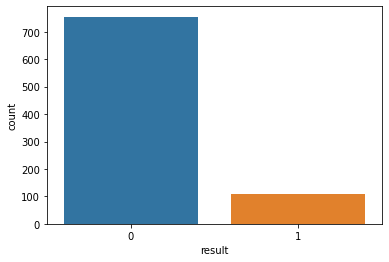

In [ ]:
 #plot 1's and 0's

d = sns.countplot(y)
d.set_xticklabels(['0', '1']) 
plt.show()

In [ ]:
#use Smote to make data balance
oversample = SMOTE(k_neighbors=2)
X_train, y_train = oversample.fit_resample(X, covid["result"])

In [ ]:
# count 1's and 0's after aplyingg smote
counter = Counter(y_train)
print(counter)

Counter({1: 755, 0: 755})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


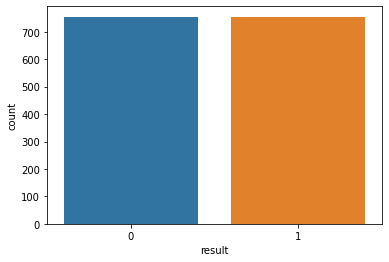

In [ ]:
# draw 1's and 0's after aplyingg smote
d = sns.countplot(y_train)
d.set_xticklabels(['0', '1']) 
plt.show()

In [ ]:
#Split data into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train , test_size=0.2,random_state=25 , shuffle=True)

In [ ]:
# scale the values because most of classifier need that
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# KNN

In [ ]:
param_grid = [
    {
        "weights":["uniform"],
        "n_neighbors":[i for i in range(3,30,2)]
    },
    {
        "weights":["distance"],
        "n_neighbors":[i for i in range(3,30,2)],
        "p":[i for i in range(1,6)]
    }
]

In [ ]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn,param_grid,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=7, we

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29],
                          'weights': ['uniform']},
                         {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

In [ ]:
bests = grid_search.best_estimator_
best_li = grid_search.best_params_
print(bests)
print(best_li)


KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3, p = 1, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [ ]:
# use  classification report to find precision_score , recall_score , accuracy_score , f1_score
y_scores = knn.predict(X_test)
print("Classification Report is:\n", classification_report(y_test, y_scores))
print("\n F1:\n", f1_score(y_test, y_scores))
print("\n Precision score is:\n", precision_score(y_test, y_scores))
print("\n Recall score is:\n", recall_score(y_test, y_scores))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_scores)))

Classification Report is:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       155
           1       0.94      0.99      0.96       147

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302


 F1:
 0.9602649006622516

 Precision score is:
 0.9354838709677419

 Recall score is:
 0.9863945578231292
Model accuracy score: 0.9603


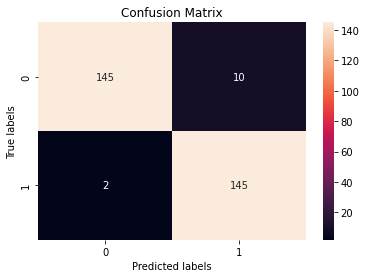

In [ ]:

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_scores)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

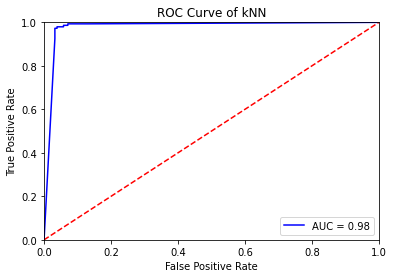

In [ ]:
# Plot AUC for kNN

y_scores = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Logistic Regression

In [ ]:
logistic = linear_model.LogisticRegression()

In [ ]:
penalty = ['l1', 'l2']
solver=['newton-cg',  'liblinear' ,'lbfgs']
C = [0.001,.009,0.01,.09,1,5,10, ]

hyperparameters = dict(C=C, penalty=penalty , solver = solver)

In [ ]:
grid_search = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs']})

In [ ]:
bests = grid_search.best_estimator_
best_li = grid_search.best_params_
print(bests)
print(best_li)


LogisticRegression(C=0.09, penalty='l1', solver='liblinear')
{'C': 0.09, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
#pip install -U scikit-learn

In [ ]:

logistic = linear_model.LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.09, random_state=3, max_iter = 500)
logistic.fit(X_train, y_train )

LogisticRegression(C=0.09, max_iter=500, penalty='l1', random_state=3,
                   solver='liblinear')

In [ ]:
# use  classification report to find precision_score , recall_score , accuracy_score , f1_score
y_scores = logistic.predict(X_test)
print("Classification Report is:\n", classification_report(y_test, y_scores))
print("\n F1:\n", f1_score(y_test, y_scores))
print("\n Precision score is:\n", precision_score(y_test, y_scores))
print("\n Recall score is:\n", recall_score(y_test, y_scores))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_scores)))

Classification Report is:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       155
           1       0.90      0.95      0.92       147

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302


 F1:
 0.9205298013245032

 Precision score is:
 0.896774193548387

 Recall score is:
 0.9455782312925171
Model accuracy score: 0.9205


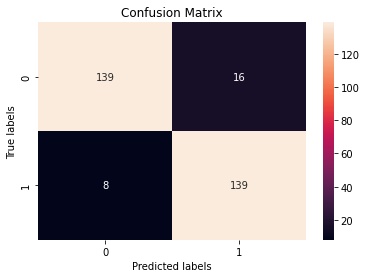

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_scores)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

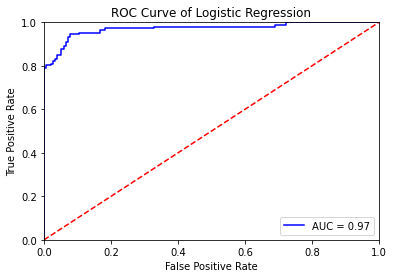

In [ ]:
# Plot AUC for Logistic Regression

y_scores= logistic.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_scores )
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.show()

# Naïve Bayes 

In [ ]:
naive_bayes = GaussianNB()

In [ ]:

var_smoothing   = [int(x) for x in np.logspace(0,-9, num=100)] 
param_grid_nb = {'var_smoothing':var_smoothing}

grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1 ,  scoring    = 'accuracy')
best_model_ = grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:

bests = grid_search.best_estimator_
best_li = grid_search.best_params_
print(bests)
print(best_li)


GaussianNB(var_smoothing=1)
{'var_smoothing': 1}


In [ ]:
naive_bayes = GaussianNB(var_smoothing=1)
naive_bayes.fit(X_train, y_train)

GaussianNB(var_smoothing=1)

In [ ]:
# use  classification report to find precision_score , recall_score , accuracy_score , f1_score
y_scores = naive_bayes.predict(X_test)
print("Classification Report is:\n", classification_report(y_test, y_scores))
print("\n F1:\n", f1_score(y_test, y_scores))
print("\n Precision score is:\n", precision_score(y_test, y_scores))
print("\n Recall score is:\n", recall_score(y_test, y_scores))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_scores)))

Classification Report is:
               precision    recall  f1-score   support

           0       0.96      0.61      0.74       155
           1       0.70      0.97      0.81       147

    accuracy                           0.78       302
   macro avg       0.83      0.79      0.78       302
weighted avg       0.83      0.78      0.78       302


 F1:
 0.8148148148148148

 Precision score is:
 0.7009803921568627

 Recall score is:
 0.9727891156462585
Model accuracy score: 0.7848


Text(0.5, 1.0, 'Confusion Matrix')

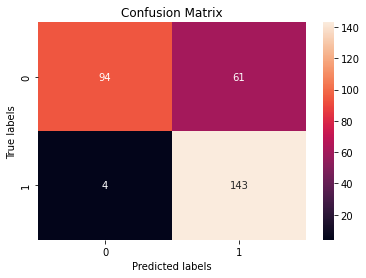

In [ ]:

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_scores)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

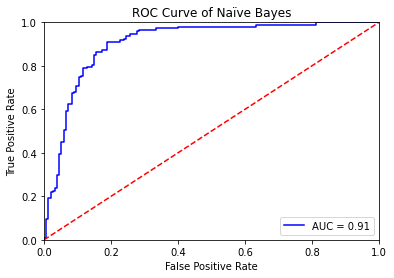

In [ ]:
# plot AUC for naive Bayes 
y_scores = naive_bayes.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naïve Bayes')
plt.show()


# Decision Trees

In [ ]:
dt = DecisionTreeClassifier(random_state=3)

In [ ]:
params = {
    'max_depth': [5, 10, 20, 25],
    'min_samples_leaf': [10, 20, 50, 100, 120],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring="f1")
best_model = grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [ ]:
bests = grid_search.best_estimator_
best_li = grid_search.best_params_
print(bests)
print(best_li)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=3)
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}


In [ ]:
dt = DecisionTreeClassifier(max_depth=5 , min_samples_leaf=10, random_state =2  , criterion= 'gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=2)

In [ ]:
# use  classification report to find precision_score , recall_score , accuracy_score , f1_score
y_scores = dt.predict(X_test)
print("Classification Report is:\n", classification_report(y_test, y_scores))
print("\n F1:\n", f1_score(y_test, y_scores))
print("\n Precision score is:\n", precision_score(y_test, y_scores))
print("\n Recall score is:\n", recall_score(y_test, y_scores))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_scores)))

Classification Report is:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       155
           1       0.95      0.97      0.96       147

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302


 F1:
 0.959731543624161

 Precision score is:
 0.9470198675496688

 Recall score is:
 0.9727891156462585
Model accuracy score: 0.9603


Text(0.5, 1.0, 'Confusion Matrix')

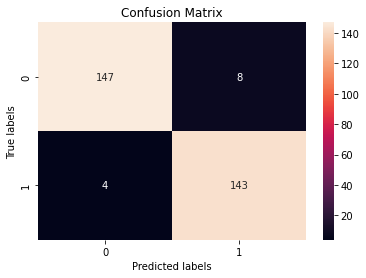

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_scores)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

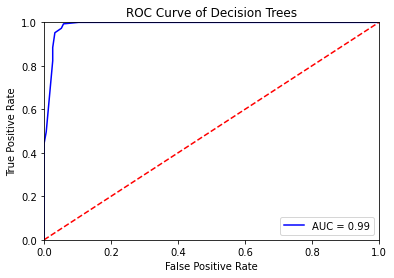

In [ ]:
# plot AUC for Decision Tree
y_scores = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Trees')
plt.show()

# Support Vector Machines 


In [ ]:
scv = SVC(random_state=3)

In [ ]:
get_grid_para = {'C': [0.1, 1, 10, 100], 
                  'kernel': ['linear', 'rbf'],
                 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                 'probability':[True,False],
                 }

In [ ]:
grid_search = GridSearchCV(estimator=scv,
                           param_grid=get_grid_para,
                           cv=4, n_jobs=-1, verbose=1, scoring="f1")
best_model = grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


In [ ]:
bests = grid_search.best_estimator_
best_li = grid_search.best_params_
print(bests)
print(best_li)

SVC(C=100, gamma=0.1, probability=True, random_state=3)
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}


In [ ]:
scv = SVC(C=100 , gamma = 0.1 ,probability= True , random_state=3 , kernel= 'rbf')
scv.fit(X_train, y_train)

SVC(C=100, gamma=0.1, probability=True, random_state=3)

In [ ]:
# use  classification report to find precision_score , recall_score , accuracy_score , f1_score
y_scores = scv.predict(X_test)
print("Classification Report is:\n", classification_report(y_test, y_scores))
print("\n F1:\n", f1_score(y_test, y_scores))
print("\n Precision score is:\n", precision_score(y_test, y_scores))
print("\n Recall score is:\n", recall_score(y_test, y_scores))
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_scores)))

Classification Report is:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.99      0.99      0.99       147

    accuracy                           0.99       302
   macro avg       0.99      0.99      0.99       302
weighted avg       0.99      0.99      0.99       302


 F1:
 0.9898305084745763

 Precision score is:
 0.9864864864864865

 Recall score is:
 0.9931972789115646
Model accuracy score: 0.9901


Text(0.5, 1.0, 'Confusion Matrix')

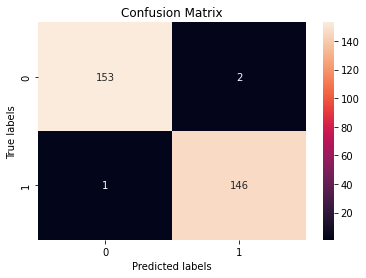

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_scores)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

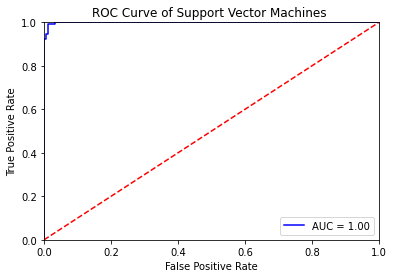

In [ ]:
# plot AUCC for SVC
y_scores = scv.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Support Vector Machines ')
plt.show()